In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [6]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

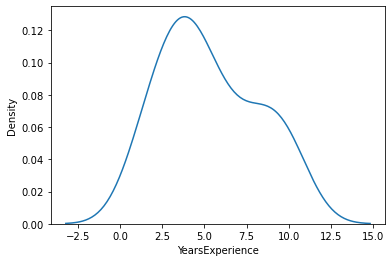

In [13]:
#Normality test
sns.distplot(salary_data['YearsExperience'],hist=False)
plt.show()

In [14]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [15]:
salary_data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

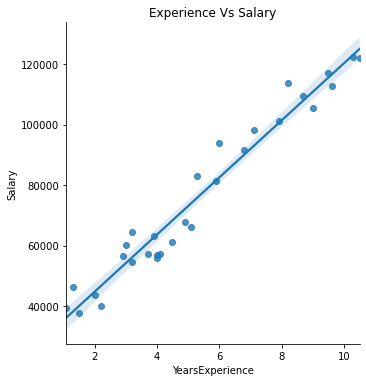

In [16]:
#2.Linearity Test
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title("Experience Vs Salary")
plt.show()

In [17]:
#Model building and training

In [37]:
linear_model=smf.ols(formula='Salary~YearsExperience',data=salary_data).fit()

In [38]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [39]:
linear_model.predict(salary_data)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [24]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        20:45:47   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ## Transformations


### 1.Logarithm transformation

In [41]:
salary_data['log_years_experience']=np.log(salary_data['YearsExperience'])
salary_data

,YearsExperience,Salary,log_years_experience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [45]:
log_model=smf.ols(formula='Salary~log_years_experience',data=salary_data).fit()

In [46]:
log_model.params

Intercept               14927.97177
log_years_experience    40581.98796
dtype: float64

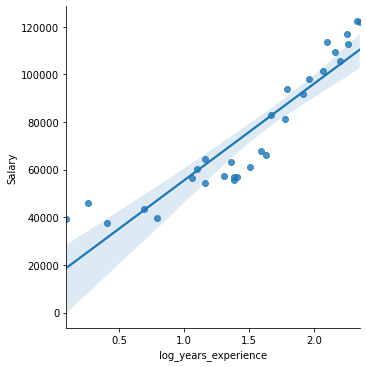

In [55]:
sns.lmplot(x='log_years_experience',y='Salary',data=salary_data)

In [49]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.25e-13
Time:                        21:00:46   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_years_experience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
log_model.rsquared

0.853888882875697

### 2. Sqrt Transformation

In [58]:
salary_data['sqrt_years_experience']=np.sqrt(salary_data['YearsExperience'])
salary_data.head()

,YearsExperience,Salary,log_years_experience,sqrt_years_experience
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


In [61]:
sqrt_model=smf.ols(formula='Salary~sqrt_years_experience',data=salary_data).fit()

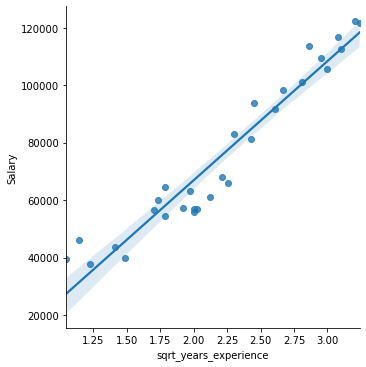

In [64]:
sns.lmplot(x='sqrt_years_experience',y='Salary',data=salary_data)

In [62]:
sqrt_model.params

Intercept               -16055.769117
sqrt_years_experience    41500.680583
dtype: float64

In [63]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           8.57e-18
Time:                        21:15:50   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_years_experience   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here,by comparing the above 3 models in which raw model gives higher r square value.So we can go with the first model